<a href="https://colab.research.google.com/github/Rumeysakeskin/Image-Classification-InceptionV3/blob/main/trasfer_learning_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
import numpy as np
import tensorflow as tf
import cv2
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras import applications
from tensorflow.keras import optimizers


In [ ]:
with tf.device('/gpu:0'):
    pass

In [ ]:
data_dir = r'dataset'

image_generator = ImageDataGenerator(validation_split=0.3)    



train_data_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1120 images belonging to 20 classes.
Found 480 images belonging to 20 classes.


In [ ]:
base_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Inception_v3_TL_flowers.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=False,
                             period=1,
                             verbose=1)

In [ ]:
# earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

In [ ]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

In [ ]:
callbacks = [checkpoint]
epochs = 50
batch_size = 32

In [ ]:
history = model.fit_generator(
    train_data_dir,
    steps_per_epoch = train_data_dir.samples // batch_size,
    validation_data = validation_dir, 
    validation_steps = validation_dir.samples // batch_size,
    epochs = epochs,
    callbacks=callbacks
    )

model.save('Inception_v3_TL_flowers.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 3.1796 - accuracy: 0.0625
Epoch 00001: saving model to Inception_v3_TL_flowers.h5
35/35 [==============================] - 18s 502ms/step - loss: 3.1796 - accuracy: 0.0625 - val_loss: 2.9867 - val_accuracy: 0.0604
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 2.9249 - accuracy: 0.1143
Epoch 00002: saving model to Inception_v3_TL_flowers.h5
35/35 [==============================] - 14s 410ms/step - loss: 2.9249 - accuracy: 0.1143 - val_loss: 2.7032 - val_accuracy: 0.2125
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 2.6733 - accuracy: 0.1911
Epoch 00003: saving model to Inception_v3_TL_flowers.h5
35/35 [==============================] - 14s 411ms/step - loss: 2.6733 - accuracy: 0.1911 - val_loss: 2.4516 - val_accuracy: 0.4187
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 2.4498 - a

35/35 [==============================] - ETA: 0s - loss: 0.3070 - accuracy: 0.9768
Epoch 00028: saving model to Inception_v3_TL_flowers.h5
35/35 [==============================] - 14s 395ms/step - loss: 0.3070 - accuracy: 0.9768 - val_loss: 0.4771 - val_accuracy: 0.9146
Epoch 29/50
35/35 [==============================] - ETA: 0s - loss: 0.3054 - accuracy: 0.9750
Epoch 00029: saving model to Inception_v3_TL_flowers.h5
35/35 [==============================] - 14s 395ms/step - loss: 0.3054 - accuracy: 0.9750 - val_loss: 0.4625 - val_accuracy: 0.9167
Epoch 30/50
35/35 [==============================] - ETA: 0s - loss: 0.2701 - accuracy: 0.9759
Epoch 00030: saving model to Inception_v3_TL_flowers.h5
35/35 [==============================] - 14s 402ms/step - loss: 0.2701 - accuracy: 0.9759 - val_loss: 0.4487 - val_accuracy: 0.9167
Epoch 31/50
35/35 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.9804
Epoch 00031: saving model to Inception_v3_TL_flowers.h5
35/35 [=====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


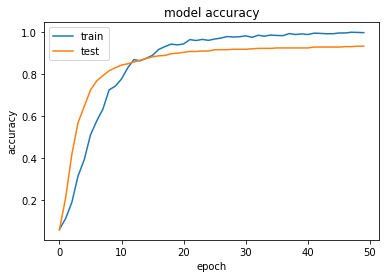

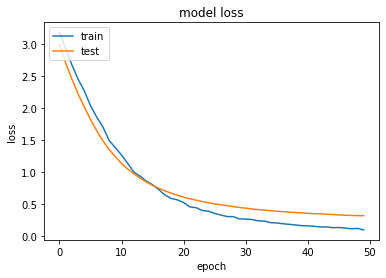

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()